In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


In [18]:
df = pd.read_csv('usage_2022_08-2024_08.csv')
df['datetime'] = pd.to_datetime(df['DATE'] + ' ' + df['START TIME'])
# 'dateless' creates timestamps as if they all occurred on the same date. Useful for graphing the daily usage patterns.
df['dateless'] = pd.to_datetime(df['START TIME'])
df['month'] = df['datetime'].dt.month
df.head()

/tmp/ipykernel_27/3397655886.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



TYPE        DATE START TIME END TIME  USAGE (kWh)   COST NOTES  \
0  Electric usage  2022-08-11      00:00    00:59         1.83  $0.78   NaN   
1  Electric usage  2022-08-11      01:00    01:59         0.41  $0.17   NaN   
2  Electric usage  2022-08-11      02:00    02:59         0.51  $0.22   NaN   
3  Electric usage  2022-08-11      03:00    03:59         0.84  $0.36   NaN   
4  Electric usage  2022-08-11      04:00    04:59         0.38  $0.16   NaN   

             datetime            dateless  month  
0 2022-08-11 00:00:00 2024-09-06 00:00:00      8  
1 2022-08-11 01:00:00 2024-09-06 01:00:00      8  
2 2022-08-11 02:00:00 2024-09-06 02:00:00      8  
3 2022-08-11 03:00:00 2024-09-06 03:00:00      8  
4 2022-08-11 04:00:00 2024-09-06 04:00:00      8

In [16]:
def heatmap(df, time_col, date_col, value_col, colorscale='Portland'):
    '''Create a heatmap of energy usage over time. 
    
    Inputs are a dataframe and the column names for the time, date, and values 
    to be mapped. The time_col can be a datetime type, but the dates must all 
    be the same so that the times align in the chart.
    
    colorscale may be a palette name string of the following list: 
    Greys, YlGnBu, Greens, YlOrRd, Bluered, RdBu, Reds, Blues, 
    Picnic, Rainbow, Portland, Jet, Hot, Blackbody, Earth, Electric, Viridis'''
    
    # Create a pivot table where rows are dates, and columns are times of day.
    data_matrix=pd.pivot_table(df, values=value_col, index=[date_col], columns=[time_col])
    
    trace = go.Heatmap(z=data_matrix.values,
                      x=data_matrix.columns.map(lambda x: x.strftime("%-I:%M %p")),
                      y=data_matrix.index,
                      colorscale=colorscale,
                      connectgaps=True,
                      colorbar=dict(title='kW'),
                      )

    data = [trace]

    layout = go.Layout(
        width=1000,
        height=4000,
        xaxis = dict(ticks='', 
                     nticks=6,
                    ),
        yaxis = dict(ticks='',
                     autorange='reversed',
                     hoverformat='%a %b %d, %Y',
                    ),
    )

    fig = go.Figure(data=data, layout=layout)

    fig.show()

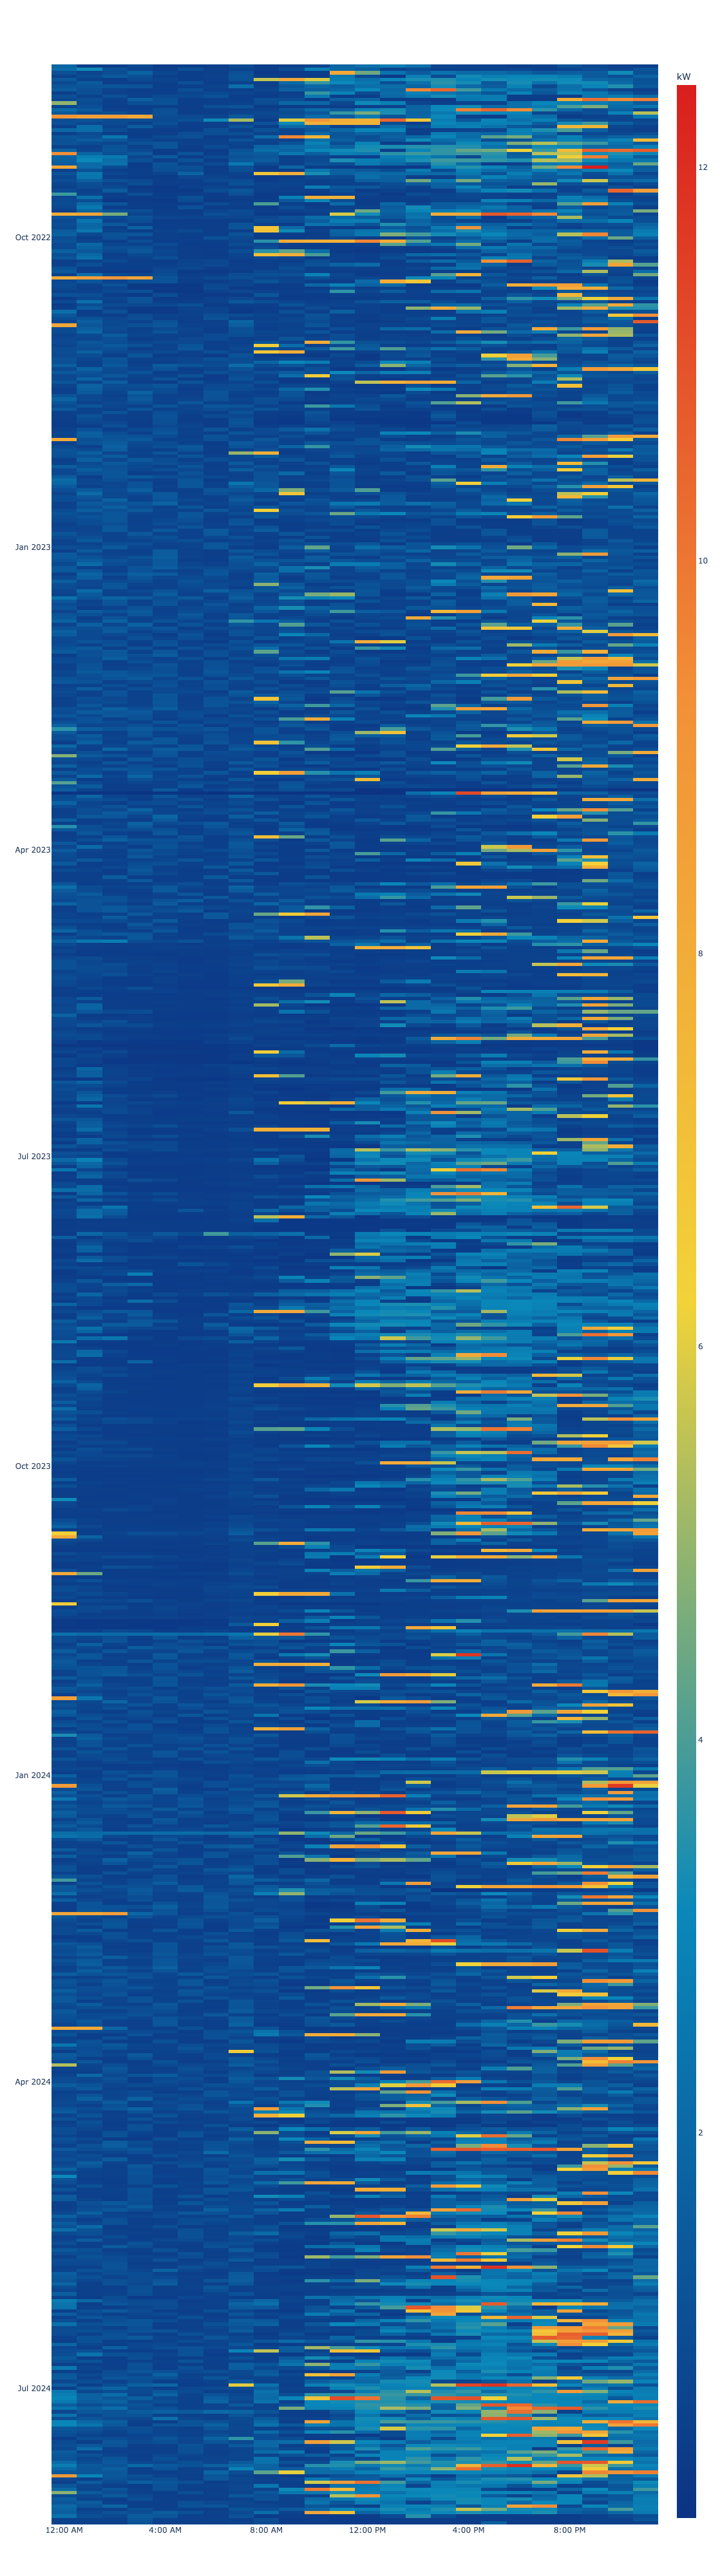

In [17]:
heatmap(df, 'dateless', 'DATE', 'USAGE (kWh)')

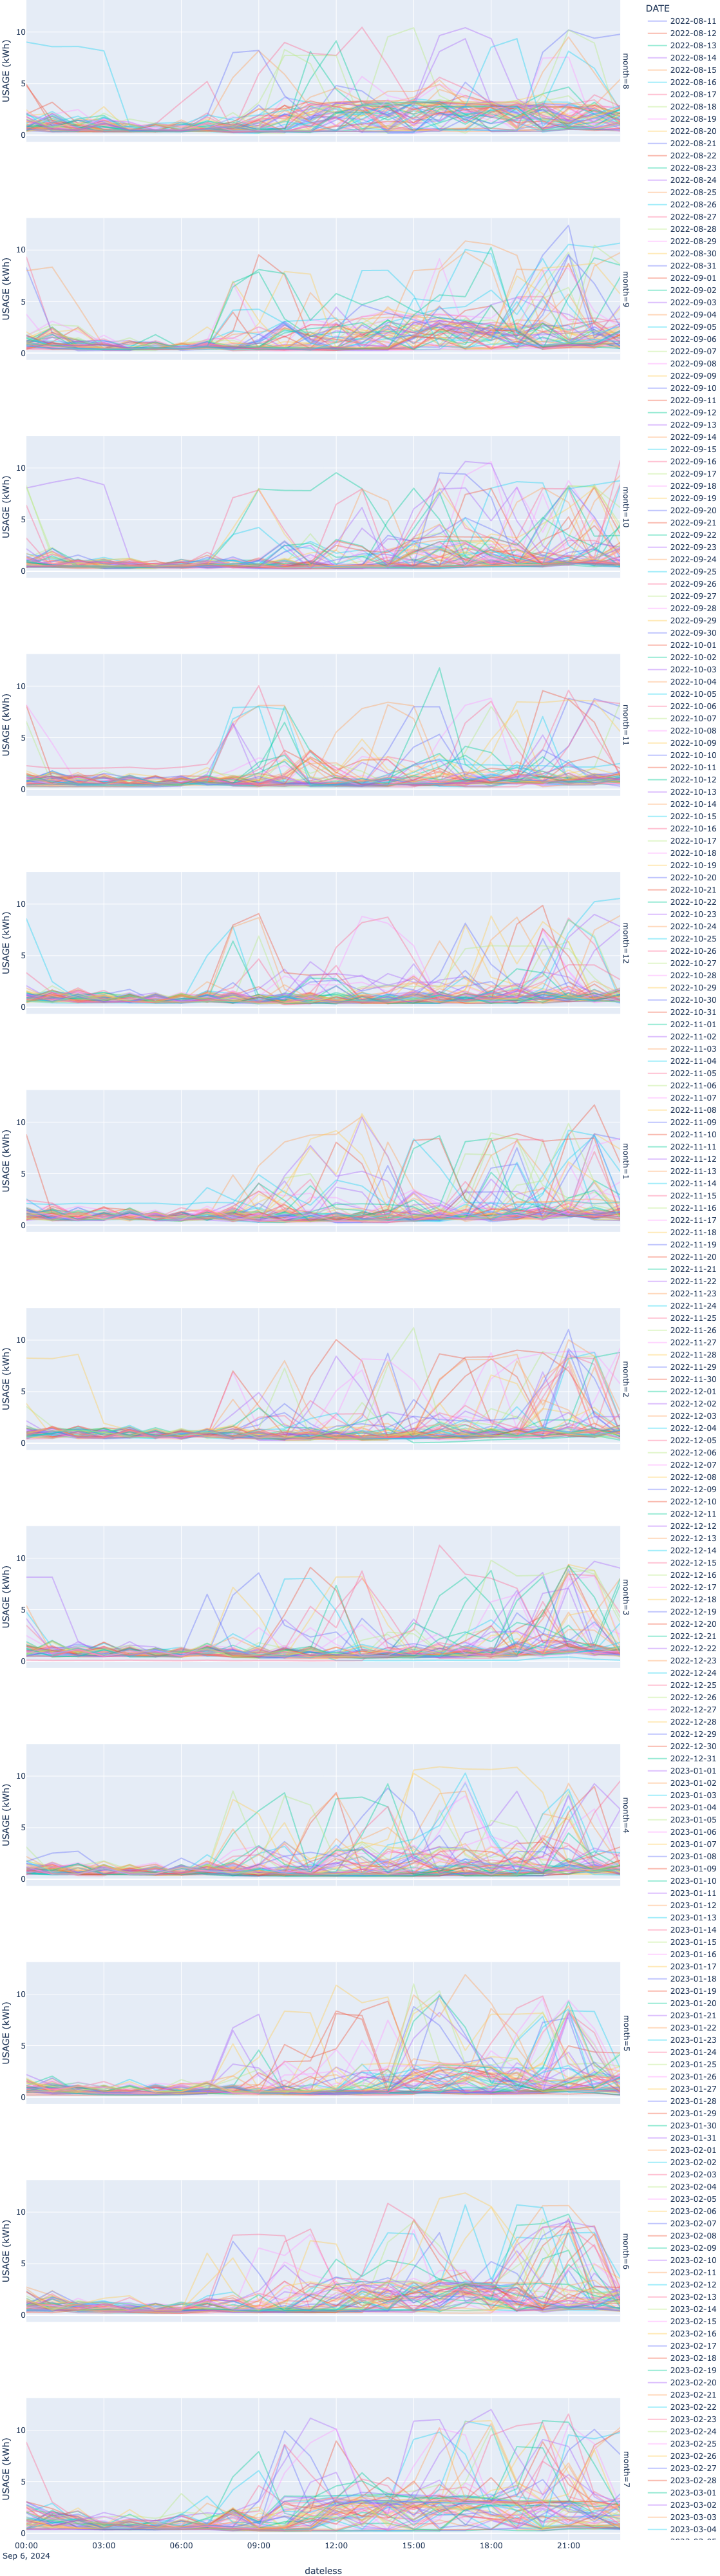

In [8]:
tdf = df[df['DATE'] > '2023-10-01']
fig = px.line(df, 'dateless', 'USAGE (kWh)', color='DATE', facet_row='month')
fig.update_layout(
    width=1000, 
    height=4000,
    margin=dict(l=0, r=0, t=0, b=0, pad=0),
)
fig.update_traces(
    # line_color='#0000ff',
    opacity=.4)
fig.show()